In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import os, sys

def load_data():

    df = pd.read_csv(r"C:\Users\cathr\Downloads\archive (2)\Retail and wherehouse Sale.csv")

    # Create DATE column
    df["DATE"] = pd.to_datetime(
        df["YEAR"].astype(str) + "-" + df["MONTH"].astype(str) + "-01"
    )

    df = df.sort_values("DATE")
    df.set_index("DATE", inplace=True)

    return df

In [3]:
def aggregate_monthly(df):
    # Use "ME" = Month End (replacement for deprecated "M")
    monthly = df.resample("ME").agg({
        "RETAIL SALES": "sum",
        "RETAIL TRANSFERS": "sum",
        "WAREHOUSE SALES": "sum"
    })

    print("\n===== Monthly Aggregated Data =====")
    print(monthly)

    return monthly

In [4]:
def plot_sales(monthly):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly["RETAIL SALES"], marker='o')
    plt.title("Monthly Retail Sales Trend")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.show()

In [5]:
def decompose_series(monthly):
    if len(monthly) < 6:
        print("\n⚠ Cannot perform seasonal decomposition.")
        print("Reason: Not enough months to form 2 full seasonal cycles.")
        print(f"Months available: {len(monthly)} (minimum required: 6)\n")
        return

    period = 3 if len(monthly) < 24 else 12

    decomposition = sm.tsa.seasonal_decompose(
        monthly["RETAIL SALES"],
        model="additive",
        period=period
    )

    decomposition.plot()
    plt.suptitle("Time Series Decomposition", fontsize=14)
    plt.show()



In [6]:

def acf_pacf_plots(monthly):
    # Safe lags for very small dataset
    lags = max(1, min(len(monthly) // 2 - 1, 5))

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    plot_acf(monthly["RETAIL SALES"], lags=lags, ax=ax[0])
    ax[0].set_title("Autocorrelation (ACF)")

    plot_pacf(monthly["RETAIL SALES"], lags=lags, ax=ax[1], method='ywm')
    ax[1].set_title("Partial Autocorrelation (PACF)")

    plt.tight_layout()
    plt.show()


In [7]:
def adf_test(monthly):
    series = monthly["RETAIL SALES"].astype(float)

    result = adfuller(series)

    print("\n===== ADF Stationarity Test =====")
    print(f"ADF Statistic : {result[0]}")
    print(f"p-value       : {result[1]}")

    if isinstance(result[3], dict):
        print("\nCritical Values:")
        for key, value in result[3].items():
            print(f"    {key}: {value}")
    else:
        print("\n(No critical values returned due to insufficient data.)")

    if result[1] < 0.05:
        print("\n✔ The series is STATIONARY — Good for forecasting.\n")
    else:
        print("\n✘ The series is NOT stationary — Differencing needed.\n")



===== Monthly Aggregated Data =====
            RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
DATE                                                       
2020-01-31      74318.77          75997.35        284114.72
2020-02-29          0.00              0.00             0.00
2020-03-31      34523.90          34505.08        113305.22
2020-04-30          0.00              0.00             0.00
2020-05-31          0.00              0.00             0.00
2020-06-30          0.00              0.00             0.00
2020-07-31      94538.96          82706.57        418094.42
2020-08-31          0.00              0.00             0.00
2020-09-30       4805.31           4612.74          7416.57


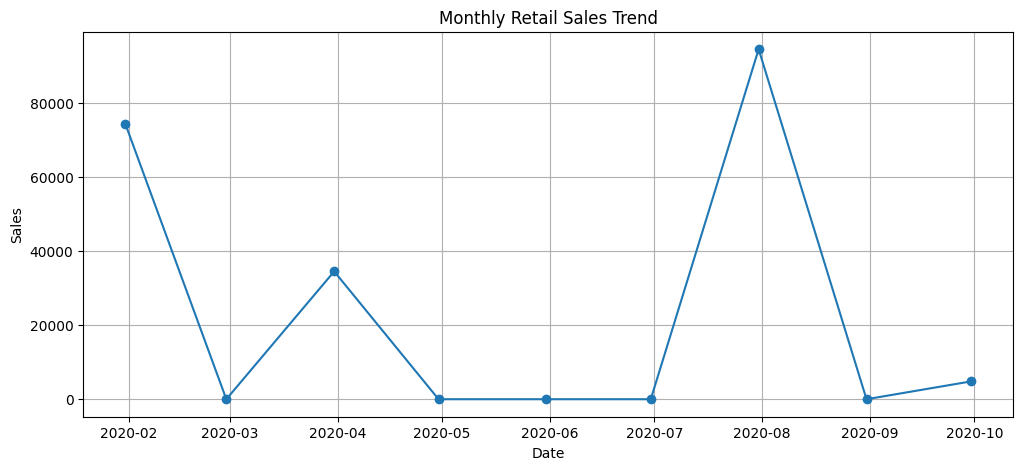

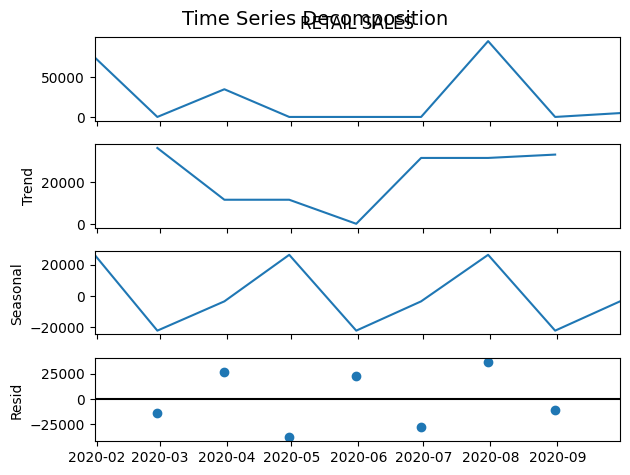

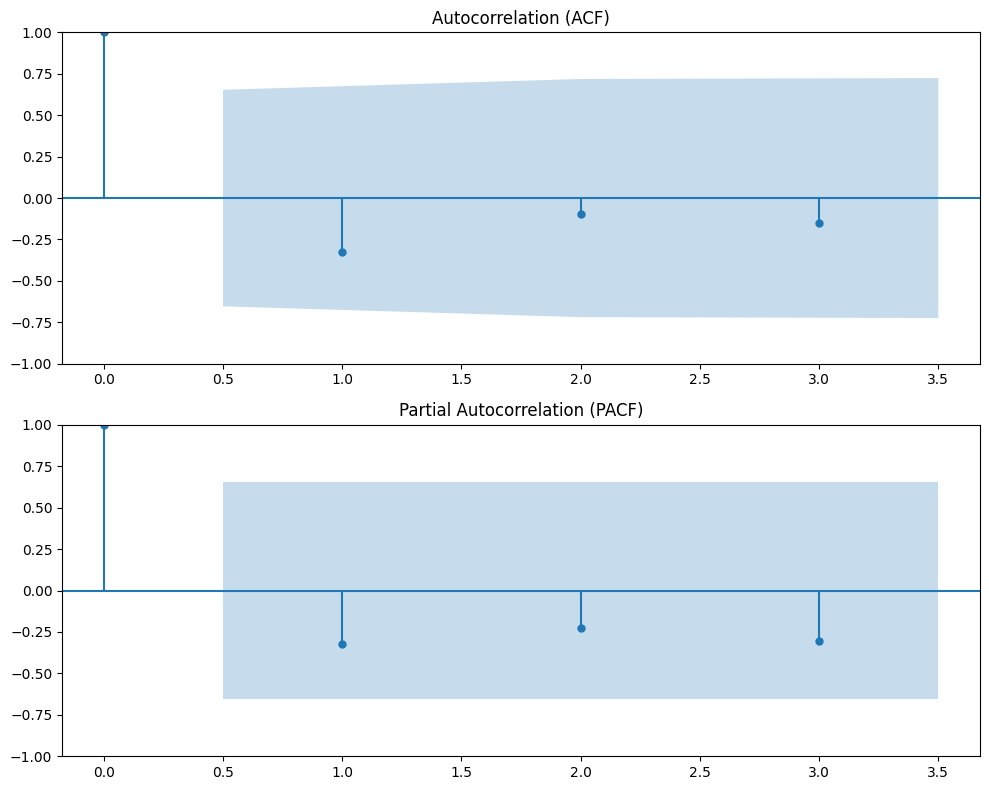


===== ADF Stationarity Test =====
ADF Statistic : -4.026386279609979
p-value       : 0.001278475754758002

(No critical values returned due to insufficient data.)

✔ The series is STATIONARY — Good for forecasting.



In [8]:
def main():
    df = load_data()

    monthly = aggregate_monthly(df)

    plot_sales(monthly)

    decompose_series(monthly)

    acf_pacf_plots(monthly)

    adf_test(monthly)


if __name__ == "__main__":
    main()